In [ ]:
# Running the Colab Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
#Calling the necessary Python libraries:
import pandas as pd
import numpy as np

Opening the Dataframe 1 "bb_ready"

In [5]:
bb = pd.read_csv('C:\\Users\\kbc\Downloads\\home-credit-default-risk\\bb_ready.csv', index_col='SK_ID_BUREAU')

In [2]:
# An useful function to analyse the dataframes

def summary(df, pred=None):
    obs = df.shape[0]
    Types = df.dtypes
    Counts = df.apply(lambda x: x.count())
    Min = df.min()
    Max = df.max()
    Uniques = df.apply(lambda x: x.unique().shape[0])
    Nulls = df.apply(lambda x: x.isnull().sum())
    print('Data shape:', df.shape)

    if pred is None:
        cols = ['Types', 'Counts', 'Uniques', 'Nulls', 'Min', 'Max']
        str = pd.concat([Types, Counts, Uniques, Nulls, Min, Max], axis = 1, sort=True)

    str.columns = cols
    print('___________________________\nData Types:')
    print(str.Types.value_counts())
    print('___________________________')
    display(str.sort_values(by='Nulls', ascending=False))

In [6]:
summary(bb)

Data shape: (817395, 18)
___________________________
Data Types:
int64      9
float64    9
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
BB_STATUS_0_count,int64,817395,98,0,0.0,97.000000
BB_STATUS_0_count_norm,float64,817395,2863,0,0.0,1.000000
counts_months,int64,817395,97,0,1.0,97.000000
BB_STATUS_X_count_norm,float64,817395,2866,0,0.0,1.000000
BB_STATUS_X_count,int64,817395,98,0,0.0,97.000000
BB_STATUS_C_count_norm,float64,817395,2852,0,0.0,1.000000
BB_STATUS_C_count,int64,817395,98,0,0.0,97.000000
BB_STATUS_5_count_norm,float64,817395,1281,0,0.0,1.000000
BB_STATUS_5_count,int64,817395,90,0,0.0,97.000000
BB_STATUS_4_count_norm,float64,817395,201,0,0.0,0.500000


Opening the Dataframe 2 "Bureau" as "bureau_0"

In [10]:
bureau_0 = pd.read_csv('C:\\Users\\kbc\Downloads\\home-credit-default-risk\\bureau.csv')

In [11]:
summary(bureau_0)

Data shape: (1716428, 17)
___________________________
Data Types:
float64    8
int64      6
object     3
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
AMT_ANNUITY,float64,489637,40322,1226791,0,1.18453e+08
AMT_CREDIT_MAX_OVERDUE,float64,591940,68252,1124488,0,1.15987e+08
DAYS_ENDDATE_FACT,float64,1082775,2918,633653,-42023,0
AMT_CREDIT_SUM_LIMIT,float64,1124648,51727,591780,-586406,4.7056e+06
AMT_CREDIT_SUM_DEBT,float64,1458759,226538,257669,-4.7056e+06,1.701e+08
DAYS_CREDIT_ENDDATE,float64,1610875,14097,105553,-42060,31199
AMT_CREDIT_SUM,float64,1716415,236709,13,0,5.85e+08
DAYS_CREDIT,int64,1716428,2923,0,-2922,0
SK_ID_BUREAU,int64,1716428,1716428,0,5000000,6843457
DAYS_CREDIT_UPDATE,int64,1716428,2982,0,-41947,372


MERGING THE TWO DATAFRAMES ON "SK_ID_BUREAU" as database "bureau"

In [12]:
bureau = pd.merge(bureau_0, bb, how='left', on="SK_ID_BUREAU")

In [ ]:
summary(bureau)

Data shape: (1716428, 35)
___________________________
Data Types:
float64    26
int64       6
object      3
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
AMT_ANNUITY,float64,489637,40322,1226791,0,1.18453e+08
AMT_CREDIT_MAX_OVERDUE,float64,591940,68252,1124488,0,1.15987e+08
BB_STATUS_3_count,float64,774354,13,942074,0,18
counts_months,float64,774354,98,942074,1,97
BB_STATUS_X_count_norm,float64,774354,2780,942074,0,1
BB_STATUS_X_count,float64,774354,99,942074,0,97
BB_STATUS_C_count_norm,float64,774354,2772,942074,0,1
BB_STATUS_C_count,float64,774354,98,942074,0,96
BB_STATUS_5_count,float64,774354,84,942074,0,89
BB_STATUS_4_count_norm,float64,774354,194,942074,0,0.5


In [13]:
bureau['CREDIT_CURRENCY'].value_counts()

currency 1    1715020
currency 2       1224
currency 3        174
currency 4         10
Name: CREDIT_CURRENCY, dtype: int64

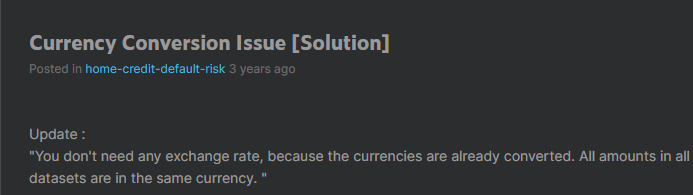

Dropping the unnecessary column 'CREDIT_CURRENCY':

In [14]:
bureau = bureau.drop(['CREDIT_CURRENCY'], axis=1)

In [15]:
# New FEATURE 1 duration

bureau['duration'] = bureau['DAYS_CREDIT_ENDDATE']-bureau['DAYS_CREDIT']

In [16]:
# New FEATURE 2 montly debt

bureau['montly_debt'] = bureau['AMT_CREDIT_SUM'] / bureau['duration'] * 30

In [17]:
# New FEATURE 3 montly debt 2

bureau['montly_debt_2'] = bureau['AMT_CREDIT_SUM'] / bureau['counts_months']

In [18]:
# New FEATURE 4 montly debt 3

bureau['montly_debt_3'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['duration'] * 30

In [19]:
# New FEATURE 5 montly debt 4

bureau['montly_debt_4'] = bureau['AMT_CREDIT_SUM_DEBT'] / bureau['counts_months']

In [20]:
# New FEATURE 6 montly debt 5

bureau['montly_debt_5'] = np.where(bureau['CREDIT_ACTIVE'] == 'Active' , bureau['AMT_CREDIT_SUM'] / bureau['counts_months'], 0)

In [21]:
# New FEATURE 7 montly debt 6

bureau['montly_debt_6'] = np.where(bureau['CREDIT_ACTIVE'] == 'Active' , bureau['AMT_CREDIT_SUM'] / bureau['duration'] * 30, 0)

In [22]:
# New FEATURE 8 montly debt 7

bureau['montly_debt_7'] = np.where(bureau['BB_STATUS_C_count'] < 1 , bureau['AMT_CREDIT_SUM'] / bureau['duration'] * 30, 0)

In [23]:
# New FEATURE 9 montly debt 8

bureau['montly_debt_8'] = np.where(bureau['BB_STATUS_C_count'] < 1 , bureau['AMT_CREDIT_SUM'] / bureau['counts_months'], 0)

In [24]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [25]:
bureau_1 = count_categorical(bureau, 'SK_ID_CURR', 'b')

In [ ]:
summary(bureau_1)

Data shape: (305811, 38)
___________________________
Data Types:
uint8      19
float64    19
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
b_CREDIT_ACTIVE_Active_count,uint8,305811,23,0,0.0,32.000000
b_CREDIT_TYPE_Microloan_count,uint8,305811,37,0,0.0,79.000000
b_CREDIT_TYPE_Loan for business development_count_norm,float64,305811,60,0,0.0,1.000000
b_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count,uint8,305811,2,0,0.0,1.000000
b_CREDIT_TYPE_Loan for purchase of shares (margin lending)_count_norm,float64,305811,4,0,0.0,0.500000
b_CREDIT_TYPE_Loan for the purchase of equipment_count,uint8,305811,3,0,0.0,2.000000
b_CREDIT_TYPE_Loan for the purchase of equipment_count_norm,float64,305811,15,0,0.0,1.000000
b_CREDIT_TYPE_Loan for working capital replenishment_count,uint8,305811,5,0,0.0,5.000000
b_CREDIT_TYPE_Loan for working capital replenishment_count_norm,float64,305811,48,0,0.0,1.000000
b_CREDIT_TYPE_Microloan_count_norm,float64,305811,227,0,0.0,1.000000


In [26]:
#Function used for calculate aggregation statistics (mean, max, min, count) for numeraical variables

def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [27]:
bureau_2 = agg_numeric(bureau, 'SK_ID_CURR', 'b')

<ipython-input-26-da49a8d03849>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[group_var] = group_ids


In [28]:
summary(bureau_2)

Data shape: (305811, 196)
___________________________
Data Types:
float64    144
int64       52
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
b_AMT_ANNUITY_min,float64,118224,15275,187587,0.000000,2.401604e+07
b_AMT_ANNUITY_max,float64,118224,30559,187587,0.000000,1.184534e+08
b_AMT_ANNUITY_mean,float64,118224,58151,187587,0.000000,2.728243e+07
b_montly_debt_4_min,float64,131156,14017,174655,-71955.480536,1.350000e+07
b_montly_debt_4_mean,float64,131156,95782,174655,-11483.337089,1.350000e+07
...,...,...,...,...,...,...
b_BB_STATUS_5_count_norm_sum,float64,305811,1562,0,0.000000,8.833334e+00
b_BB_STATUS_5_count_norm_count,int64,305811,61,0,0.000000,1.160000e+02
b_BB_STATUS_5_count_count,int64,305811,61,0,0.000000,1.160000e+02
b_BB_STATUS_4_count_sum,float64,305811,19,0,0.000000,2.700000e+01


In [29]:
#MERGING THE TWO DATAFRAMES ON "SK_ID_BUREAU" as database "bureau"

bureau_3 = pd.merge(bureau_1, bureau_2, how='left', on="SK_ID_CURR")

In [30]:
summary(bureau_3)

Data shape: (305811, 234)
___________________________
Data Types:
float64    163
int64       52
uint8       19
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
b_AMT_ANNUITY_max,float64,118224,30559,187587,0.000000,1.184534e+08
b_AMT_ANNUITY_mean,float64,118224,58151,187587,0.000000,2.728243e+07
b_AMT_ANNUITY_min,float64,118224,15275,187587,0.000000,2.401604e+07
b_montly_debt_4_mean,float64,131156,95782,174655,-11483.337089,1.350000e+07
b_montly_debt_4_min,float64,131156,14017,174655,-71955.480536,1.350000e+07
...,...,...,...,...,...,...
b_CREDIT_ACTIVE_Closed_count_norm,float64,305811,319,0,0.000000,1.000000e+00
b_CREDIT_ACTIVE_Sold_count,uint8,305811,8,0,0.000000,9.000000e+00
b_CREDIT_ACTIVE_Sold_count_norm,float64,305811,76,0,0.000000,1.000000e+00
b_CREDIT_DAY_OVERDUE_count,int64,305811,64,0,1.000000,1.160000e+02


 New FEATURE 10
 Groupby the client id (SK_ID_CURR), count the number of previous loans, and rename the column

In [31]:
f10 = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
f10.head()

,SK_ID_CURR,previous_loan_counts
0,100001,7
1,100002,8
2,100003,4
3,100004,2
4,100005,3


In [35]:
#MERGING THE TWO DATAFRAMES ON "SK_ID_BUREAU" as database "bureau"

bureau_ready_0 = pd.merge(bureau_3, f10, how='left', on="SK_ID_CURR")

In [36]:
summary(bureau_ready_0)

Data shape: (305811, 235)
___________________________
Data Types:
float64    163
int64       53
uint8       19
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
b_AMT_ANNUITY_max,float64,118224,30559,187587,0.000000,1.184534e+08
b_AMT_ANNUITY_mean,float64,118224,58151,187587,0.000000,2.728243e+07
b_AMT_ANNUITY_min,float64,118224,15275,187587,0.000000,2.401604e+07
b_montly_debt_4_mean,float64,131156,95782,174655,-11483.337089,1.350000e+07
b_montly_debt_4_min,float64,131156,14017,174655,-71955.480536,1.350000e+07
...,...,...,...,...,...,...
b_CREDIT_ACTIVE_Closed_count_norm,float64,305811,319,0,0.000000,1.000000e+00
b_CREDIT_ACTIVE_Sold_count,uint8,305811,8,0,0.000000,9.000000e+00
b_CREDIT_ACTIVE_Sold_count_norm,float64,305811,76,0,0.000000,1.000000e+00
b_CREDIT_DAY_OVERDUE_count,int64,305811,64,0,1.000000,1.160000e+02


In [37]:
# function for diminishing memory used. (optional) 
import sys

# def return_size(df):
#     """Return size of dataframe in gigabytes"""
#     return round(sys.getsizeof(df) / 1e9, 2)

def convert_types(df, print_info = False):
    
    original_memory = df.memory_usage().sum()
    
    # Iterate through each column
    for c in df:
        
        # Convert ids and booleans to integers
        if ('SK_ID' in c):
            df[c] = df[c].fillna(0).astype(np.int32)
            
        # Convert objects to category
        elif (df[c].dtype == 'object') and (df[c].nunique() < df.shape[0]):
            df[c] = df[c].astype('category')
        
        # Booleans mapped to integers
        elif list(df[c].unique()) == [1, 0]:
            df[c] = df[c].astype(bool)
        
        # Float64 to float32
        elif df[c].dtype == float:
            df[c] = df[c].astype(np.float32)
            
        # Int64 to int32
        elif df[c].dtype == int:
            df[c] = df[c].astype(np.int32)
        
    new_memory = df.memory_usage().sum()
    
    if print_info:
        print(f'Original Memory Usage: {round(original_memory / 1e9, 2)} gb.')
        print(f'New Memory Usage: {round(new_memory / 1e9, 2)} gb.')
        
    return df

In [40]:
bureau_ready = convert_types(bureau_ready_0, print_info = True)

Original Memory Usage: 0.34 gb.
New Memory Usage: 0.34 gb.


In [41]:
summary(bureau_ready)

Data shape: (305811, 235)
___________________________
Data Types:
float32    163
int64       52
uint8       19
int32        1
Name: Types, dtype: int64
___________________________


,Types,Counts,Uniques,Nulls,Min,Max
b_AMT_ANNUITY_max,float32,118224,30559,187587,0.000000,118453424.0
b_AMT_ANNUITY_mean,float32,118224,58039,187587,0.000000,27282428.0
b_AMT_ANNUITY_min,float32,118224,15275,187587,0.000000,24016036.0
b_montly_debt_4_mean,float32,131156,95684,174655,-11483.336914,13500000.0
b_montly_debt_4_min,float32,131156,14017,174655,-71955.484375,13500000.0
...,...,...,...,...,...,...
b_CREDIT_ACTIVE_Closed_count_norm,float32,305811,319,0,0.000000,1.0
b_CREDIT_ACTIVE_Sold_count,uint8,305811,8,0,0.000000,9.0
b_CREDIT_ACTIVE_Sold_count_norm,float32,305811,76,0,0.000000,1.0
b_CREDIT_DAY_OVERDUE_count,int64,305811,64,0,1.000000,116.0


In [ ]:
bureau_ready.to_csv('/content/drive/MyDrive/Home Credit/home-credit-default-risk/bureau_ready.csv', index = False)